# Make English Speech Dataset
- Combining 7 English Speech Dataset
- Dataset: CREMA-D, MELD, RAVDESS, SAVEE, TESS, ESD, JL-Corpus
- Our team discarded MLEND, as it does not have short sentences as an input, but numbers

## 0. Import Libraries

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9

import os
import glob
import tqdm
import warnings
warnings.filterwarnings('ignore')

In [187]:
print("Numpy Version:", np.__version__)
print("Pandas Version:", pd.__version__)

Numpy Version: 1.26.4
Pandas Version: 2.2.1


In [188]:
RAW_DATASET_PATH = "../dataset"

## 1. Load Dataset and Make Sub Dataframes
### 1) CREMA-D
> https://github.com/CheyneyComputerScience/CREMA-D

- `VideoDemographics.csv` - a mapping of ActorID (the first 4 digits of each video file) to Age, Sex, Race, and Ethicity.
```shell
"ActorID" - the first 4 digits of the video/audio file that identifies the actor in the video.
"Age" - the age in years of the actor at the time of the recording
"Sex" - the binary sex that the actor identified
"Race" - African American, Asian, Caucasian, or Unknown
"Ethnicity" - Hispanic or Not Hispanic
```
- Actors spoke from a selection of 12 sentences (in parentheses is the three letter acronym used in the second part of the filename):
```
It's eleven o'clock (IEO).
That is exactly what happened (TIE).
I'm on my way to the meeting (IOM).
I wonder what this is about (IWW).
The airplane is almost full (TAI).
Maybe tomorrow it will be cold (MTI).
I would like a new alarm clock (IWL)
I think I have a doctor's appointment (ITH).
Don't forget a jacket (DFA).
I think I've seen this before (ITS).
The surface is slick (TSI).
We'll stop in a couple of minutes (WSI).
```
- The sentences were presented using different emotion (in parentheses is the three letter code used in the third part of the filename):
```
Anger (ANG)
Disgust (DIS)
Fear (FEA)
Happy/Joy (HAP)
Neutral (NEU)
Sad (SAD)
```
- Emotion level (in parentheses is the two letter code used in the fourth part of the filename):
```
Low (LO)
Medium (MD)
High (HI)
Unspecified (XX)
```

In [189]:
crema_dir = f'{RAW_DATASET_PATH}/crema-d'
crema_filepath = glob.glob(os.path.join(crema_dir, "AudioWAV", "*.wav"))
crema_filename = os.listdir(os.path.join(crema_dir, "AudioWAV"))

print(crema_filename[:5])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav']


In [190]:
crema_count = len(crema_filename)
print("The Number of CREMA-D Dataset:", crema_count)

The Number of CREMA-D Dataset: 7442


In [191]:
# CSV metadata load
meta_data_list = glob.glob(os.path.join(crema_dir, '*.csv')) + glob.glob(os.path.join(crema_dir, 'processedResults', '*.csv'))

for csv in meta_data_list:
    csv_file = pd.read_csv(csv, low_memory=False)
    print(csv)
    print(csv_file.head())
    print("-"*100)

../dataset/crema-d\SentenceFilenames.csv
   Stimulus_Number         Filename
0                1  1001_IEO_NEU_XX
1                2  1001_IEO_HAP_LO
2                3  1001_IEO_HAP_MD
3                4  1001_IEO_HAP_HI
4                5  1001_IEO_SAD_LO
----------------------------------------------------------------------------------------------------
../dataset/crema-d\VideoDemographics.csv
   ActorID  Age     Sex              Race     Ethnicity
0     1001   51    Male         Caucasian  Not Hispanic
1     1002   21  Female         Caucasian  Not Hispanic
2     1003   21  Female         Caucasian  Not Hispanic
3     1004   42  Female         Caucasian  Not Hispanic
4     1005   29    Male  African American  Not Hispanic
----------------------------------------------------------------------------------------------------
../dataset/crema-d\processedResults\summaryTable.csv
   Unnamed: 0         FileName VoiceVote VoiceLevel FaceVote FaceLevel  \
0           1  1001_IEO_NEU_XX       

In [192]:
feature_list = []
for fn in crema_filename:
    feature_list.append(fn.split(".wav")[0].split("_"))

In [193]:
print(np.shape(feature_list))
print(feature_list[:10])

(7442, 4)
[['1001', 'DFA', 'ANG', 'XX'], ['1001', 'DFA', 'DIS', 'XX'], ['1001', 'DFA', 'FEA', 'XX'], ['1001', 'DFA', 'HAP', 'XX'], ['1001', 'DFA', 'NEU', 'XX'], ['1001', 'DFA', 'SAD', 'XX'], ['1001', 'IEO', 'ANG', 'HI'], ['1001', 'IEO', 'ANG', 'LO'], ['1001', 'IEO', 'ANG', 'MD'], ['1001', 'IEO', 'DIS', 'HI']]


In [194]:
crema_ext = [os.path.splitext(fn)[-1] for fn in crema_filename]
crema_speaker = ["Crema_"+str(f[0]) for f in feature_list]

In [195]:
crema_sub_df = pd.read_csv(os.path.join(crema_dir, "VideoDemographics.csv"))

crema_age = []
crema_gender = []
crema_race = []
crema_accent = []
for f in feature_list:
    row = crema_sub_df['ActorID'] == int(f[0])
    
    crema_age.append(crema_sub_df['Age'][row].values[0])
    crema_gender.append(crema_sub_df['Sex'][row].values[0])
    crema_race.append(crema_sub_df['Race'][row].values[0])
    crema_accent.append(crema_sub_df['Ethnicity'][row].values[0])

In [196]:
crema_text_list = {"IEO":"It's eleven o'clock", "TIE":"That is exactly what happened", "IOM":"I'm on my way to the meeting",
                  "IWW":"I wonder what this is about", "TAI":"The airplane is almost full", "MTI":"Maybe tomorrow it will be cold",
                  "IWL":"I would like a new alarm clock", "ITH":"I think I have a doctor's appointment",
                  "DFA":"Don't forget a jacket", "ITS":"I think I've seen this before", "TSI":"The surface is slick",
                  "WSI":"We'll stop in a couple of minutes"}
crema_text = [crema_text_list[f[1]] for f in feature_list]

crema_emotion_list = {"ANG":"Anger", "DIS":"Disgust", "FEA":"Fear", "HAP":"Happy", "NEU":"Neutral", "SAD":"Sad"}
crema_emotion = [crema_emotion_list[f[2]] for f in feature_list]

crema_level_list = {"LO":"Low", "MD":"Medium", "HI":"High", "XX":"Unspecified"}
crema_level = [crema_level_list[f[3]] for f in feature_list]

In [197]:
crema_df = pd.DataFrame(index = range(0, crema_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Speaker', 'Text', 
                             'Gender', 'Age', 'Race', 'Accent', 'Intensity/Level', 'Sentiment', 'Emotion'])

In [198]:
crema_df['Dataset'] = ['CREMA-D'] * crema_count
crema_df['Filepath'] = [p[len(RAW_DATASET_PATH)+1:] for p in crema_filepath]
crema_df['Filename'] = crema_filename
crema_df['Ext'] = crema_ext
crema_df['Speaker'] = crema_speaker
crema_df['Text'] = crema_text
crema_df['Gender'] = crema_gender
crema_df['Age'] = crema_age
crema_df['Race'] = crema_race
crema_df['Accent'] = crema_accent
crema_df['Intensity/Level'] = crema_level
crema_df['Emotion'] = crema_emotion

In [199]:
crema_df.head()

,Id,Dataset,Filepath,Filename,Ext,Speaker,Text,Gender,Age,Race,Accent,Intensity/Level,Sentiment,Emotion
0,NaN,CREMA-D,crema-d\AudioWAV\1001_DFA_ANG_XX.wav,1001_DFA_ANG_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Caucasian,Not Hispanic,Unspecified,NaN,Anger
1,NaN,CREMA-D,crema-d\AudioWAV\1001_DFA_DIS_XX.wav,1001_DFA_DIS_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Caucasian,Not Hispanic,Unspecified,NaN,Disgust
2,NaN,CREMA-D,crema-d\AudioWAV\1001_DFA_FEA_XX.wav,1001_DFA_FEA_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Caucasian,Not Hispanic,Unspecified,NaN,Fear
3,NaN,CREMA-D,crema-d\AudioWAV\1001_DFA_HAP_XX.wav,1001_DFA_HAP_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Caucasian,Not Hispanic,Unspecified,NaN,Happy
4,NaN,CREMA-D,crema-d\AudioWAV\1001_DFA_NEU_XX.wav,1001_DFA_NEU_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Caucasian,Not Hispanic,Unspecified,NaN,Neutral


In [200]:
print(crema_df['Gender'].value_counts())

Gender
Male      3930
Female    3512
Name: count, dtype: int64


In [201]:
print(crema_df['Intensity/Level'].value_counts())

Intensity/Level
Unspecified    6077
High            455
Low             455
Medium          455
Name: count, dtype: int64


### 2) MELD
> https://affective-meld.github.io/
- There are `train`, `test` and `dev` data in MELD dataset
- We only use `train`.

- `train_sent_emo.csv`, `test_sent_emo.csv`
```shell
"Sr No."	Serial numbers of the utterances mainly for referencing the utterances in case of different versions or multiple copies with different subsets
"Utterance"	Individual utterances from EmotionLines as a string.
"Speaker"	Name of the speaker associated with the utterance.
"Emotion"	The emotion (neutral, joy, sadness, anger, surprise, fear, disgust) expressed by the speaker in the utterance.
"Sentiment"	The sentiment (positive, neutral, negative) expressed by the speaker in the utterance.
"Dialogue_ID"	The index of the dialogue starting from 0.
"Utterance_ID"	The index of the particular utterance in the dialogue starting from 0.
"Season"	The season no. of Friends TV Show to which a particular utterance belongs.
"Episode"	The episode no. of Friends TV Show in a particular season to which the utterance belongs.
"StartTime"	The starting time of the utterance in the given episode in the format 'hh:mm:ss,ms'.
"EndTime"	The ending time of the utterance in the given episode in the format 'hh:mm:ss,ms'.
```

In [202]:
meld_dir = f'{RAW_DATASET_PATH}/meld'

meld_filepath = glob.glob(os.path.join(meld_dir, "train", "*.mp4"))
meld_filename = os.listdir(os.path.join(meld_dir, "train"))

print(meld_filename[:5])

['dia0_utt0.mp4', 'dia0_utt1.mp4', 'dia0_utt10.mp4', 'dia0_utt11.mp4', 'dia0_utt12.mp4']


In [203]:
meld_sub_df = pd.read_csv(os.path.join(meld_dir, 'train_sent_emo.csv'))

meld_sub_df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [204]:
meld_sub_df.Season.value_counts()

Season
3    1609
1    1402
7    1380
6    1317
5    1265
4    1129
8    1108
9     490
2     289
Name: count, dtype: int64

In [205]:
meld_text = []
meld_speaker = []
meld_emotion = []
meld_sentiment = []
meld_ext = []
emotion_list = {"anger":"Anger", "disgust":"Disgust", "fear":"Fear", "joy":"Happy", 
                "neutral":"Neutral", "sadness":"Sad", "surprise":"Surprise"}
for fn in meld_filename:
    name, ext = os.path.splitext(fn)
    dia, utt = name.split("_")
    dia = int(dia.replace("dia", ""))
    utt = int(utt.replace("utt", ""))
    
    row = meld_sub_df[(meld_sub_df['Dialogue_ID']==dia) & (meld_sub_df['Utterance_ID']==utt)]
    
    emo = row['Emotion'].values[0]
    meld_emotion.append(emotion_list[emo])
    
    meld_ext.append(ext)
    meld_text.append(row['Utterance'].values[0]) 
    meld_speaker.append("Meld_" + row['Speaker'].values[0])
    meld_sentiment.append(row['Sentiment'].values[0])

In [206]:
meld_count = len(meld_text)
print("The Number of MELD Dataset:", meld_count)

The Number of MELD Dataset: 9989


In [207]:
meld_df = pd.DataFrame(index = range(0, meld_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Speaker', 'Text', 
                             'Gender', 'Age', 'Race', 'Accent', 'Intensity/Level', 'Sentiment', 'Emotion'])

In [208]:
meld_df['Dataset'] = ["MELD"] * meld_count
meld_df['Filepath'] = [p[len(RAW_DATASET_PATH)+1:] for p in meld_filepath]
meld_df['Filename'] = meld_filename
meld_df['Ext'] = meld_ext
meld_df['Speaker'] = meld_speaker
meld_df['Text'] = meld_text
meld_df['Sentiment'] = meld_sentiment
meld_df['Emotion'] = meld_emotion

In [209]:
meld_df['Speaker'].value_counts()[:10]

Speaker
Meld_Joey        1509
Meld_Ross        1459
Meld_Rachel      1435
Meld_Phoebe      1321
Meld_Monica      1299
Meld_Chandler    1283
Meld_Janice        58
Meld_Carol         46
Meld_Emily         43
Meld_Tag           41
Name: count, dtype: int64

We impute the gender and age for main cast. Age is the mean age throughout all seasons.

In [210]:
for i in range(len(meld_df)):
    if meld_df.Speaker[i] in (['Meld_Joey', 'Meld_Ross', 'Meld_Chandler']):
        meld_df['Gender'][i] = 'Male'
        if meld_df.Speaker[i] == 'Meld_Joey':
            meld_df['Age'][i] = 32
        elif meld_df.Speaker[i] == 'Meld_Ross':
            meld_df['Age'][i] = 32
        elif meld_df.Speaker[i] == 'Meld_Chandler':
            meld_df['Age'][i] = 29
    if meld_df.Speaker[i]  in (['Meld_Monica', 'Meld_Phoebe', 'Meld_Rachel']):
        meld_df['Gender'][i] = 'Female'
        if meld_df.Speaker[i] == 'Meld_Monica':
            meld_df['Age'][i] = 35
        elif meld_df.Speaker[i] == 'Meld_Phoebe':
            meld_df['Age'][i] = 36
        elif meld_df.Speaker[i] == 'Meld_Rachel':
            meld_df['Age'][i] = 30

In [211]:
meld_df.head()

,Id,Dataset,Filepath,Filename,Ext,Speaker,Text,Gender,Age,Race,Accent,Intensity/Level,Sentiment,Emotion
0,NaN,MELD,meld\train\dia0_utt0.mp4,dia0_utt0.mp4,.mp4,Meld_Chandler,also I was the point person on my companys tr...,Male,29,NaN,NaN,NaN,neutral,Neutral
1,NaN,MELD,meld\train\dia0_utt1.mp4,dia0_utt1.mp4,.mp4,Meld_The Interviewer,You mustve had your hands full.,NaN,NaN,NaN,NaN,NaN,neutral,Neutral
2,NaN,MELD,meld\train\dia0_utt10.mp4,dia0_utt10.mp4,.mp4,Meld_Chandler,No dont I beg of you!,Male,29,NaN,NaN,NaN,negative,Fear
3,NaN,MELD,meld\train\dia0_utt11.mp4,dia0_utt11.mp4,.mp4,Meld_The Interviewer,"All right then, well have a definite answer f...",NaN,NaN,NaN,NaN,NaN,neutral,Neutral
4,NaN,MELD,meld\train\dia0_utt12.mp4,dia0_utt12.mp4,.mp4,Meld_Chandler,Really?!,Male,29,NaN,NaN,NaN,positive,Surprise


### 3) MLEnd - not relatable as the text is just a single number
> https://www.kaggle.com/datasets/jesusrequena/mlend-spoken-numerals
- Speakers read one english word (zero to billion).

In [212]:
#mlend_dir = f'{RAW_DATASET_PATH}/mlend'

#mlend_filepath = glob.glob(os.path.join(mlend_dir, 'MLEndSND_Public', "*.wav"))
#mlend_filename = os.listdir(os.path.join(mlend_dir, 'MLEndSND_Public'))

#print(mlend_filename[:5])

In [213]:
"""for path in glob.glob(os.path.join(mlend_dir, "*.csv")):
    print(path)
    csv = pd.read_csv(path)
    print(csv.tail(), "\n")"""

'for path in glob.glob(os.path.join(mlend_dir, "*.csv")):\n    print(path)\n    csv = pd.read_csv(path)\n    print(csv.tail(), "\n")'

In [214]:
"""mlend_sub_df1 = pd.read_csv(f'{RAW_DATASET_PATH}/mlend\MLEndSND_Audio_Attributes.csv")
mlend_sub_df1.head()"""

'mlend_sub_df1 = pd.read_csv(f\'{RAW_DATASET_PATH}/mlend\\MLEndSND_Audio_Attributes.csv")\nmlend_sub_df1.head()'

In [215]:
"""mlend_sub_df2 = pd.read_csv(f'{RAW_DATASET_PATH}/mlend\MLEndSND_Speakers_Demographics.csv")
mlend_sub_df2.head()"""

'mlend_sub_df2 = pd.read_csv(f\'{RAW_DATASET_PATH}/mlend\\MLEndSND_Speakers_Demographics.csv")\nmlend_sub_df2.head()'

In [216]:
"""mlend_count = len(mlend_filename)
print("The Number of MLEND Dataset:", mlend_count)"""

'mlend_count = len(mlend_filename)\nprint("The Number of MLEND Dataset:", mlend_count)'

In [217]:
"""mlend_speaker = []
mlend_accent = []
mlend_emotion = []
mlend_text = []
mlend_ext = []
emotion_list = {"excited":"Happy", "neutral":"Neutral", "bored":"Bored", "question":"Question"}
for i in range(mlend_count):
    _, ext = os.path.splitext(mlend_filename[i])
    speaker_num = mlend_sub_df1.iloc[i]["Speaker"]
    speaker = "Mlend_" + str(speaker_num)
    
    
    accent = mlend_sub_df2["Nationality"][mlend_sub_df2["Speaker"] == speaker_num].values[0]
    
    emotion = mlend_sub_df1.iloc[i]["Intonation"]
    emotion = emotion_list[emotion]
    text = str(mlend_sub_df1.iloc[i]["Numeral"])
    
    mlend_speaker.append(speaker)
    mlend_accent.append(accent)
    mlend_emotion.append(emotion)
    mlend_text.append(text)
    mlend_ext.append(ext)"""

'mlend_speaker = []\nmlend_accent = []\nmlend_emotion = []\nmlend_text = []\nmlend_ext = []\nemotion_list = {"excited":"Happy", "neutral":"Neutral", "bored":"Bored", "question":"Question"}\nfor i in range(mlend_count):\n    _, ext = os.path.splitext(mlend_filename[i])\n    speaker_num = mlend_sub_df1.iloc[i]["Speaker"]\n    speaker = "Mlend_" + str(speaker_num)\n    \n    \n    accent = mlend_sub_df2["Nationality"][mlend_sub_df2["Speaker"] == speaker_num].values[0]\n    \n    emotion = mlend_sub_df1.iloc[i]["Intonation"]\n    emotion = emotion_list[emotion]\n    text = str(mlend_sub_df1.iloc[i]["Numeral"])\n    \n    mlend_speaker.append(speaker)\n    mlend_accent.append(accent)\n    mlend_emotion.append(emotion)\n    mlend_text.append(text)\n    mlend_ext.append(ext)'

In [218]:
"""mlend_df = pd.DataFrame(index = range(0, mlend_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Speaker', 'Text', 
                             'Gender', 'Age', 'Race', 'Accent', 'Intensity/Level', 'Sentiment', 'Emotion'])"""

"mlend_df = pd.DataFrame(index = range(0, mlend_count), \n                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Speaker', 'Text', \n                             'Gender', 'Age', 'Race', 'Accent', 'Intensity/Level', 'Sentiment', 'Emotion'])"

In [219]:
"""mlend_df['Dataset'] = ["MLEND"] * mlend_count
mlend_df['Filepath'] = [p[len(RAW_DATASET_PATH)+1:] for p in mlend_filepath]
mlend_df['Filename'] = mlend_filename
mlend_df['Ext'] = mlend_ext
mlend_df['Speaker'] = mlend_speaker
mlend_df['Text'] = mlend_text
mlend_df['Accent'] = mlend_accent
mlend_df['Emotion'] = mlend_emotion"""

'mlend_df[\'Dataset\'] = ["MLEND"] * mlend_count\nmlend_df[\'Filepath\'] = [p[len(RAW_DATASET_PATH)+1:] for p in mlend_filepath]\nmlend_df[\'Filename\'] = mlend_filename\nmlend_df[\'Ext\'] = mlend_ext\nmlend_df[\'Speaker\'] = mlend_speaker\nmlend_df[\'Text\'] = mlend_text\nmlend_df[\'Accent\'] = mlend_accent\nmlend_df[\'Emotion\'] = mlend_emotion'

In [220]:
"""mlend_df.head()"""

'mlend_df.head()'

### 4) RAVDESS
> https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
- Only two kinds of statement.

- Labels in Filename.
```shell
Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
Vocal channel (01 = speech, 02 = song).
Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
Repetition (01 = 1st repetition, 02 = 2nd repetition).
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
```
```shell
Filename example: 03-01-06-01-02-01-12.wav

Audio-only (03)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12)
Female, as the actor ID number is even.
```

In [221]:
rav_dir = f'{RAW_DATASET_PATH}/ravdess'
actor_list = os.listdir(rav_dir)
actor_list[:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [222]:
rav_filepath = []
rav_filename = []
rav_ext = []
rav_emotion = []
rav_intensity = []
rav_text = []
rav_speaker = []
rav_gender = []

emotion_list = {'01':'Neutral', '02':'Calm', '03':'Happy', '04':'Sad', '05':'Anger', '06':'Fear', '07':'Disgust', '08':'Surprise'}
intensity_list = {'01':"Medium", '02':"High"}
text_list = {'01':'Kids are talking by the door', '02':'Dogs are sitting by the door'}

for act in actor_list:
    paths = glob.glob(os.path.join(rav_dir, act, "*.wav")) 
    names = os.listdir(os.path.join(rav_dir, act))
    
    for i in range(len(names)):
        name, ext = os.path.splitext(names[i])
        num_list = name.split("-")
        
        emotion = emotion_list[num_list[2]]
        intensity = intensity_list[num_list[3]]
        text = text_list[num_list[4]]
        speaker = "Ravdess_" + num_list[6]
        
        if int(num_list[6])%2 == 0:
            gender = 'Female'
        else:
            gender = "Male"
        
        rav_filepath.append(paths[i])
        rav_filename.append(names[i])
        rav_ext.append(ext)
        
        rav_emotion.append(emotion)
        rav_intensity.append(intensity)
        rav_text.append(text)
        rav_speaker.append(speaker)
        rav_gender.append(gender)

In [223]:
rav_count = len(rav_filepath)
print("The Number of RAVDESS Dataset:", rav_count)

The Number of RAVDESS Dataset: 1440


In [224]:
rav_df = pd.DataFrame(index = range(0, rav_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Speaker', 'Text', 
                             'Gender', 'Age', 'Race', 'Accent', 'Intensity/Level', 'Sentiment', 'Emotion'])

In [225]:
rav_df["Dataset"] = ["RAVDESS"] * rav_count
rav_df['Filepath'] = [p[len(RAW_DATASET_PATH)+1:] for p in rav_filepath]
rav_df['Filename'] = rav_filename
rav_df['Ext'] = rav_ext
rav_df['Emotion'] = rav_emotion
rav_df['Intensity/Level'] = rav_intensity
rav_df['Text'] = rav_text
rav_df['Speaker'] = rav_speaker
rav_df['Gender'] = rav_gender
rav_df['Age'] = [29] * rav_count # mean age of speakers

In [226]:
rav_df.head()

,Id,Dataset,Filepath,Filename,Ext,Speaker,Text,Gender,Age,Race,Accent,Intensity/Level,Sentiment,Emotion
0,NaN,RAVDESS,ravdess\Actor_01\03-01-01-01-01-01-01.wav,03-01-01-01-01-01-01.wav,.wav,Ravdess_01,Kids are talking by the door,Male,29,NaN,NaN,Medium,NaN,Neutral
1,NaN,RAVDESS,ravdess\Actor_01\03-01-01-01-01-02-01.wav,03-01-01-01-01-02-01.wav,.wav,Ravdess_01,Kids are talking by the door,Male,29,NaN,NaN,Medium,NaN,Neutral
2,NaN,RAVDESS,ravdess\Actor_01\03-01-01-01-02-01-01.wav,03-01-01-01-02-01-01.wav,.wav,Ravdess_01,Dogs are sitting by the door,Male,29,NaN,NaN,Medium,NaN,Neutral
3,NaN,RAVDESS,ravdess\Actor_01\03-01-01-01-02-02-01.wav,03-01-01-01-02-02-01.wav,.wav,Ravdess_01,Dogs are sitting by the door,Male,29,NaN,NaN,Medium,NaN,Neutral
4,NaN,RAVDESS,ravdess\Actor_01\03-01-02-01-01-01-01.wav,03-01-02-01-01-01-01.wav,.wav,Ravdess_01,Kids are talking by the door,Male,29,NaN,NaN,Medium,NaN,Calm


In [227]:
print(rav_df['Intensity/Level'].value_counts())

Intensity/Level
Medium    768
High      672
Name: count, dtype: int64


### 5) SAVEE
> https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee

- Labels in Filename
```shell
"a":"Anger"
"d":"Disgust"
"f":"Fear"
"h":"Happy"
"n":"Neutral"
"sa":"Sad"
"su":"Surprise"
```

In [228]:
savee_dir = f'{RAW_DATASET_PATH}/savee'
savee_filename = os.listdir(savee_dir)
savee_filepath = glob.glob(os.path.join(savee_dir, "*.wav"))
print(savee_filename[:5])

savee_count = len(savee_filepath)
print("The Number of SAVEE Dataset:", savee_count)

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']
The Number of SAVEE Dataset: 480


In [229]:
savee_ext = []
savee_emotion = []
savee_speaker = []
emotion_list = {"a":"Anger", "d":"Disgust", "f":"Fear", "h":"Happy", "n":"Neutral", "sa":"Sad", "su":"Surprise"}
for fn in savee_filename:
    name, ext = os.path.splitext(fn)
    
    speaker, emo = name.split("_")
    emo = emo[:-2]
    emotion = emotion_list[emo]
    speaker = "Savee_" + speaker

    savee_ext.append(ext)
    savee_emotion.append(emotion)
    savee_speaker.append(speaker)

In [230]:
savee_df = pd.DataFrame(index = range(0, savee_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Speaker', 'Text', 
                             'Gender', 'Age', 'Race', 'Accent', 'Intensity/Level', 'Sentiment', 'Emotion'])

In [231]:
savee_df['Dataset'] = ["SAVEE"] * savee_count
savee_df['Gender'] = ["Male"] * savee_count
savee_df['Filepath'] = [p[len(RAW_DATASET_PATH)+1:] for p in savee_filepath]
savee_df['Filename'] = savee_filename
savee_df['Ext'] = savee_ext
savee_df['Speaker'] = savee_speaker
savee_df['Emotion'] = savee_emotion

In [232]:
savee_df.head()

,Id,Dataset,Filepath,Filename,Ext,Speaker,Text,Gender,Age,Race,Accent,Intensity/Level,Sentiment,Emotion
0,NaN,SAVEE,savee\DC_a01.wav,DC_a01.wav,.wav,Savee_DC,NaN,Male,NaN,NaN,NaN,NaN,NaN,Anger
1,NaN,SAVEE,savee\DC_a02.wav,DC_a02.wav,.wav,Savee_DC,NaN,Male,NaN,NaN,NaN,NaN,NaN,Anger
2,NaN,SAVEE,savee\DC_a03.wav,DC_a03.wav,.wav,Savee_DC,NaN,Male,NaN,NaN,NaN,NaN,NaN,Anger
3,NaN,SAVEE,savee\DC_a04.wav,DC_a04.wav,.wav,Savee_DC,NaN,Male,NaN,NaN,NaN,NaN,NaN,Anger
4,NaN,SAVEE,savee\DC_a05.wav,DC_a05.wav,.wav,Savee_DC,NaN,Male,NaN,NaN,NaN,NaN,NaN,Anger


### 6) TESS
> https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess

- Labels in Folder name

```shell
OAF: 64, Female
YAF: 26, Female
```

In [233]:
tess_dir = f'{RAW_DATASET_PATH}/tess'
tess_folders = os.listdir(tess_dir)
print(tess_folders)

['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']


In [234]:
tess_filepath = []
tess_filename = []
tess_ext = []
tess_speaker = []
tess_age = []
tess_emotion = []
emotion_list = {"angry":"Anger", "disgust":"Disgust", "happy": "Happy", "neutral":"Neutral", "Sad":"Sad", "sad":"Sad", 
                "Fear":"Fear", "fear":"Fear", "Pleasant_surprise":"Surprise", "pleasant_surprised":"Surprise"}
for f in tess_folders:
    speaker = f[:3]
    emotion = emotion_list[f[4:]]
    
    if speaker == "OAF":
        age = 64
    else: age = 26
        
    speaker = "Tess_" + speaker    
    filenames = os.listdir(os.path.join(tess_dir, f))
    filepaths = glob.glob(os.path.join(tess_dir, f, "*.wav"))
    
    for i in range(len(filenames)):
        _, ext = os.path.splitext(filenames[i])
        
    
        tess_filepath.append(filepaths[i])
        tess_filename.append(filenames[i])
        tess_ext.append(ext)
        tess_speaker.append(speaker)
        tess_age.append(age)
        tess_emotion.append(emotion)
    

In [235]:
tess_count = len(tess_filepath)
print("The Number of TESS Dataset:", tess_count)

The Number of TESS Dataset: 2800


In [236]:
tess_df = pd.DataFrame(index = range(0, tess_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Speaker', 'Text', 
                             'Gender', 'Age', 'Race', 'Accent', 'Intensity/Level', 'Sentiment', 'Emotion'])

In [237]:
tess_df["Dataset"] = ["TESS"] * tess_count
tess_df["Gender"] = ["Female"] * tess_count
tess_df["Filepath"] = tess_filepath
tess_df["Filename"] = tess_filename
tess_df["Ext"] = tess_ext
tess_df["Speaker"] = tess_speaker
tess_df["Age"] = tess_age
tess_df["Emotion"] = tess_emotion

In [238]:
tess_df.head()

,Id,Dataset,Filepath,Filename,Ext,Speaker,Text,Gender,Age,Race,Accent,Intensity/Level,Sentiment,Emotion
0,NaN,TESS,../dataset/tess\OAF_angry\OAF_back_angry.wav,OAF_back_angry.wav,.wav,Tess_OAF,NaN,Female,64,NaN,NaN,NaN,NaN,Anger
1,NaN,TESS,../dataset/tess\OAF_angry\OAF_bar_angry.wav,OAF_bar_angry.wav,.wav,Tess_OAF,NaN,Female,64,NaN,NaN,NaN,NaN,Anger
2,NaN,TESS,../dataset/tess\OAF_angry\OAF_base_angry.wav,OAF_base_angry.wav,.wav,Tess_OAF,NaN,Female,64,NaN,NaN,NaN,NaN,Anger
3,NaN,TESS,../dataset/tess\OAF_angry\OAF_bath_angry.wav,OAF_bath_angry.wav,.wav,Tess_OAF,NaN,Female,64,NaN,NaN,NaN,NaN,Anger
4,NaN,TESS,../dataset/tess\OAF_angry\OAF_bean_angry.wav,OAF_bean_angry.wav,.wav,Tess_OAF,NaN,Female,64,NaN,NaN,NaN,NaN,Anger


### 7) ESD
> https://hltsingapore.github.io/ESD/download.html
- There is only English data in folder `0011` to `0020`.

In [239]:
esd_dir = f'{RAW_DATASET_PATH}/esd'
esd_folders = os.listdir(esd_dir)

In [240]:
esd_folders

['0011',
 '0012',
 '0013',
 '0014',
 '0015',
 '0016',
 '0017',
 '0018',
 '0019',
 '0020']

In [241]:
esd_sub_df = []
for f in esd_folders:
    path = os.path.join(esd_dir, f, f+".txt")
    with open(path, "r") as f:
        for line in f:
            esd_sub_df.append(line.strip().split("\t"))

In [242]:
print(np.shape(esd_sub_df))
print(esd_sub_df[0])

esd_count = len(esd_sub_df)
print("The Number of ESD Dataset:", esd_count)

(17500, 3)
['0011_000001', 'The nine the eggs, I keep.', 'Neutral']
The Number of ESD Dataset: 17500


In [243]:
esd_ext = []
esd_filename = []
esd_filepath = []
esd_text = []
esd_emotion = []
esd_speaker = []
emotion_list = {"Angry":"Anger", "Happy":"Happy", "Neutral":"Neutral", "Sad":"Sad", "Surprise":"Surprise"}
for sub in esd_sub_df:
    ext = ".wav"
    filename = sub[0] + ext
    speaker = sub[0][:4]
    filepath = os.path.join(esd_dir, speaker, sub[2], filename)
    
    emotion = emotion_list[sub[2]]
    text = sub[1]
    speaker = "Esd_" + speaker
    
    esd_ext.append(ext)
    esd_filename.append(filename)
    esd_filepath.append(filepath)
    esd_text.append(text)
    esd_emotion.append(emotion)
    esd_speaker.append(speaker)

In [244]:
esd_df = pd.DataFrame(index = range(0, esd_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Speaker', 'Text', 
                             'Gender', 'Age', 'Race', 'Accent', 'Intensity/Level', 'Sentiment', 'Emotion'])

In [245]:
esd_df['Dataset'] = ["ESD"] * esd_count
esd_df['Filepath'] = [p[len(RAW_DATASET_PATH)+1:] for p in esd_filepath]
esd_df['Filename'] = esd_filename
esd_df['Ext'] = esd_ext
esd_df['Speaker'] = esd_speaker
esd_df['Text'] = esd_text
esd_df['Emotion'] = esd_emotion

In [246]:
esd_df.head()

,Id,Dataset,Filepath,Filename,Ext,Speaker,Text,Gender,Age,Race,Accent,Intensity/Level,Sentiment,Emotion
0,NaN,ESD,esd\0011\Neutral\0011_000001.wav,0011_000001.wav,.wav,Esd_0011,"The nine the eggs, I keep.",NaN,NaN,NaN,NaN,NaN,NaN,Neutral
1,NaN,ESD,esd\0011\Neutral\0011_000002.wav,0011_000002.wav,.wav,Esd_0011,"I did go, and made many prisoners.",NaN,NaN,NaN,NaN,NaN,NaN,Neutral
2,NaN,ESD,esd\0011\Neutral\0011_000003.wav,0011_000003.wav,.wav,Esd_0011,That I owe my thanks to you.,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
3,NaN,ESD,esd\0011\Neutral\0011_000004.wav,0011_000004.wav,.wav,Esd_0011,They went up to the dark mass job had pointed ...,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
4,NaN,ESD,esd\0011\Neutral\0011_000005.wav,0011_000005.wav,.wav,Esd_0011,Clear than clear water!,NaN,NaN,NaN,NaN,NaN,NaN,Neutral


### 8) JL Corpus
> https://www.kaggle.com/datasets/tli725/jl-corpus

- Labels in Filename
```
File naming rule: (Gender)(speaker.ID)_(Emotion)_(Sentence.ID)(session.ID)
```

In [247]:
jl_dir = f'{RAW_DATASET_PATH}/jl-corpus/Raw JL corpus (unchecked and unannotated)/JL(wav+txt)'
print(os.listdir(jl_dir)[:5])

['female1_angry_10a_1.txt', 'female1_angry_10a_1.wav', 'female1_angry_10a_2.txt', 'female1_angry_10a_2.wav', 'female1_angry_10b_1.txt']


In [248]:
jl_filename = os.listdir(jl_dir)
jl_filename = [fn for fn in jl_filename if os.path.splitext(fn)[1] == '.wav']
jl_filepath = glob.glob(os.path.join(jl_dir, "*.wav"))

In [249]:
jl_count = len(jl_filename)
print("The Number of JL-Corpus Dataset:", jl_count)

The Number of JL-Corpus Dataset: 2400


In [250]:
jl_ext = []
jl_emotion = []
jl_gender = []
jl_speaker = []
jl_text = []
emotion_list = {"angry":"Anger", "anxious":"Anxious", "apologetic":"Apologetic", "assertive":"Assertive", "concerned":"Concerned", 
                "encouraging":"Encouraging", "excited":"Excited", "happy":"Happy", "neutral":"Neutral", "sad":"Sad"}
gender_list = {"female1":"Female", "female2":"Female", "male1":"Male", "male2":"Male"}
for i in range(jl_count):
    name, ext = os.path.splitext(jl_filename[i])
    fn_list = jl_filename[i].split("_")
    
    speaker = "Jlcorpus_" + fn_list[0]
    gender = gender_list[fn_list[0]]
    emotion = emotion_list[fn_list[1]]
    
    text = ''
    with open(os.path.join(jl_dir, name + ".txt"), "r") as f:
        for line in f:
            text += line

    jl_text.append(text)
    jl_ext.append(ext)
    jl_emotion.append(emotion)
    jl_gender.append(gender)
    jl_speaker.append(speaker)

In [251]:
print(np.unique(jl_emotion))

['Anger' 'Anxious' 'Apologetic' 'Assertive' 'Concerned' 'Encouraging'
 'Excited' 'Happy' 'Neutral' 'Sad']


In [252]:
jl_df = pd.DataFrame(index = range(0, jl_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Speaker', 'Text', 
                             'Gender', 'Age', 'Race', 'Accent', 'Intensity/Level', 'Sentiment', 'Emotion'])

In [253]:
jl_df['Dataset'] = ['JL-CORPUS'] * jl_count
jl_df['Filepath'] = [p[len(RAW_DATASET_PATH)+1:] for p in jl_filepath]
jl_df['Filename'] = jl_filename
jl_df['Ext'] = jl_ext
jl_df['Speaker'] = jl_speaker
jl_df['Text'] = jl_text
jl_df['Gender'] = jl_gender
jl_df['Emotion'] = jl_emotion

In [254]:
jl_df.head()

,Id,Dataset,Filepath,Filename,Ext,Speaker,Text,Gender,Age,Race,Accent,Intensity/Level,Sentiment,Emotion
0,NaN,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,female1_angry_10a_1.wav,.wav,Jlcorpus_female1,Water harms the new born boy.,Female,NaN,NaN,NaN,NaN,NaN,Anger
1,NaN,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,female1_angry_10a_2.wav,.wav,Jlcorpus_female1,Water harms the new born boy.,Female,NaN,NaN,NaN,NaN,NaN,Anger
2,NaN,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,female1_angry_10b_1.wav,.wav,Jlcorpus_female1,Water harms the new born boy.,Female,NaN,NaN,NaN,NaN,NaN,Anger
3,NaN,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,female1_angry_10b_2.wav,.wav,Jlcorpus_female1,Water harms the new born boy.,Female,NaN,NaN,NaN,NaN,NaN,Anger
4,NaN,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,female1_angry_11a_1.wav,.wav,Jlcorpus_female1,I have not seen my tooth.,Female,NaN,NaN,NaN,NaN,NaN,Anger


# Additional preprocessing

The first thing to enhance the quality of our dataset is to handle the repetitions, and intenisty levels. As not all datasets have them, repetitions of the same thing with the same emotion (including different levels of emotion) might lead to bias, thus we decide to simplify the data, by removing repeatitions, and select only one intensisty level.

In [255]:
all_datasets = pd.concat([crema_df, meld_df, rav_df, savee_df, tess_df, esd_df, jl_df])
emotion_counts = all_datasets['Emotion'].value_counts()
emotion_df = pd.DataFrame({'Emotion': emotion_counts.index, 'Count': emotion_counts.values})
emotion_df = emotion_df.sort_values(by='Count', ascending=False)
emotion_df

,Emotion,Count
0,Neutral,10153
1,Happy,7406
2,Anger,6772
3,Sad,6346
4,Surprise,5357
5,Disgust,2194
6,Fear,2191
7,Anxious,240
8,Apologetic,240
9,Assertive,240


In [256]:
crema_df = crema_df[crema_df['Intensity/Level'] == 'Unspecified']
meld_df  = meld_df
rav_df   = rav_df[rav_df['Intensity/Level'] == 'Medium']
rav_df   = rav_df[::2]
savee_df = savee_df
tess_df  = tess_df
esd_df   = esd_df
jl_df    = jl_df[::4]

In [257]:
all_datasets = pd.concat([crema_df, meld_df, rav_df, savee_df, tess_df, esd_df, jl_df])
emotion_counts = all_datasets['Emotion'].value_counts()
emotion_df = pd.DataFrame({'Emotion': emotion_counts.index, 'Count': emotion_counts.values})
emotion_df = emotion_df.sort_values(by='Count', ascending=False)
emotion_df

,Emotion,Count
0,Neutral,9925
1,Happy,6809
2,Anger,6175
3,Sad,5749
4,Surprise,5213
5,Disgust,1777
6,Fear,1774
7,Anxious,60
8,Apologetic,60
9,Assertive,60


The next step is the emotion selection. As we can see, some of them are heavily underrepresented. The main question is if we want to limit ourselves to top 5 or top 7 emotions, as the last 2 groups have 3 times less observations, which might lead to performance issues.

In [258]:
crema_df = crema_df
meld_df  = meld_df
rav_df   = rav_df[rav_df['Emotion'] != 'Calm']
savee_df = savee_df
tess_df  = tess_df
esd_df   = esd_df
jl_df    = jl_df[~jl_df.Emotion.isin(['Anxious', 'Apologetic', 'Concerned', 'Encouraging', 'Assertive', 'Excited'])]

In [259]:
all_datasets = pd.concat([crema_df, meld_df,  rav_df, savee_df, tess_df, esd_df, jl_df])
emotion_counts = all_datasets['Emotion'].value_counts()
emotion_df = pd.DataFrame({'Emotion': emotion_counts.index, 'Count': emotion_counts.values})
emotion_df = emotion_df.sort_values(by='Count', ascending=False)
emotion_df

,Emotion,Count
0,Neutral,9925
1,Happy,6809
2,Anger,6175
3,Sad,5749
4,Surprise,5213
5,Disgust,1777
6,Fear,1774


# 2. Make Dataframe

In [260]:
#df = pd.concat([crema_df, meld_df, mlend_df, rav_df, savee_df, tess_df, esd_df, jl_df], ignore_index = True)
df = pd.concat([crema_df, meld_df, rav_df, savee_df, tess_df, esd_df, jl_df], ignore_index = True)
df

,Id,Dataset,Filepath,Filename,Ext,Speaker,Text,Gender,Age,Race,Accent,Intensity/Level,Sentiment,Emotion
0,NaN,CREMA-D,crema-d\AudioWAV\1001_DFA_ANG_XX.wav,1001_DFA_ANG_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Caucasian,Not Hispanic,Unspecified,NaN,Anger
1,NaN,CREMA-D,crema-d\AudioWAV\1001_DFA_DIS_XX.wav,1001_DFA_DIS_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Caucasian,Not Hispanic,Unspecified,NaN,Disgust
2,NaN,CREMA-D,crema-d\AudioWAV\1001_DFA_FEA_XX.wav,1001_DFA_FEA_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Caucasian,Not Hispanic,Unspecified,NaN,Fear
3,NaN,CREMA-D,crema-d\AudioWAV\1001_DFA_HAP_XX.wav,1001_DFA_HAP_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Caucasian,Not Hispanic,Unspecified,NaN,Happy
4,NaN,CREMA-D,crema-d\AudioWAV\1001_DFA_NEU_XX.wav,1001_DFA_NEU_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Caucasian,Not Hispanic,Unspecified,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37417,NaN,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_5a_1.wav,.wav,Jlcorpus_male2,The lord swims in the sea.,Male,NaN,NaN,NaN,NaN,NaN,Sad
37418,NaN,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_6a_1.wav,.wav,Jlcorpus_male2,Jack views an art piece.,Male,NaN,NaN,NaN,NaN,NaN,Sad
37419,NaN,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_7a_1.wav,.wav,Jlcorpus_male2,Carl leaps into a jeep.,Male,NaN,NaN,NaN,NaN,NaN,Sad
37420,NaN,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_8a_1.wav,.wav,Jlcorpus_male2,Linda asks for more darts.,Male,NaN,NaN,NaN,NaN,NaN,Sad


In [261]:
df['Id'] = np.arange(len(df))
df.tail()

,Id,Dataset,Filepath,Filename,Ext,Speaker,Text,Gender,Age,Race,Accent,Intensity/Level,Sentiment,Emotion
37417,37417,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_5a_1.wav,.wav,Jlcorpus_male2,The lord swims in the sea.,Male,NaN,NaN,NaN,NaN,NaN,Sad
37418,37418,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_6a_1.wav,.wav,Jlcorpus_male2,Jack views an art piece.,Male,NaN,NaN,NaN,NaN,NaN,Sad
37419,37419,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_7a_1.wav,.wav,Jlcorpus_male2,Carl leaps into a jeep.,Male,NaN,NaN,NaN,NaN,NaN,Sad
37420,37420,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_8a_1.wav,.wav,Jlcorpus_male2,Linda asks for more darts.,Male,NaN,NaN,NaN,NaN,NaN,Sad
37421,37421,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_9a_1.wav,.wav,Jlcorpus_male2,Find your boot in this shute.,Male,NaN,NaN,NaN,NaN,NaN,Sad


In [262]:
df.to_csv(f"{RAW_DATASET_PATH}/speech_dataset.csv", index=False)

# Short EDA

In [263]:
# add title in plotnine
p9.options.figure_size = (20, 4)
p9.options.dpi = 100
p9.options.title = p9.element_text(size=20, face='bold')

def plots(df):
     p1 = (p9.ggplot(data=df) + 
          p9.geom_bar(p9.aes(x='Emotion'), fill='blue') + 
          p9.theme_minimal() +
          p9.ggtitle("Emotion Distribution"))

     print(p1)
     p2 = (p9.ggplot(data=df) + 
          p9.geom_bar(p9.aes(x='Gender'), fill='blue') + 
          p9.theme_minimal()+
          p9.ggtitle("Gender Distribution"))
     print(p2)
     p3= (p9.ggplot(data=df) + 
          p9.geom_bar(p9.aes(x='Speaker'), fill='blue') + 
          p9.theme_minimal()+
          p9.ggtitle("Speaker Distribution"))
     print(p3)
     p5= (p9.ggplot(data=df) + 
          p9.geom_bar(p9.aes(x='Ext'), fill='blue') + 
          p9.theme_minimal()+
          p9.ggtitle("Extension Distribution"))
     print(p5)
     p6= (p9.ggplot(data=df) + 
          p9.geom_bar(p9.aes(x='Dataset'), fill='blue') + 
          p9.theme_minimal()+
          p9.ggtitle("Dataset Distribution"))
     print(p6)
     p7= (p9.ggplot(data=df) + 
          p9.geom_bar(p9.aes(x='Age'), fill='blue') + 
          p9.theme_minimal()+
          p9.ggtitle("Age Distribution"))
     print(p7)
     p8= (p9.ggplot(data=df) + 
          p9.geom_bar(p9.aes(x='Race'), fill='blue') + 
          p9.theme_minimal()+
          p9.ggtitle("Race Distribution"))
     print(p8)
     p10= (p9.ggplot(data=df) + 
          p9.geom_bar(p9.aes(x='Accent'), fill='blue') + 
          p9.theme_minimal()+
          p9.ggtitle("Accent Distribution"))
     print(p10)
     p11= (p9.ggplot(data=df) + 
          p9.geom_bar(p9.aes(x='Intensity/Level'), fill='blue') + 
          p9.theme_minimal()+
          p9.ggtitle("Intensity/Level Distribution"))
     print(p11)
     p12= (p9.ggplot(data=df) + 
          p9.geom_bar(p9.aes(x='Sentiment'), fill='blue') + 
          p9.theme_minimal()+
          p9.ggtitle("Sentiment Distribution"))
     print(p12)

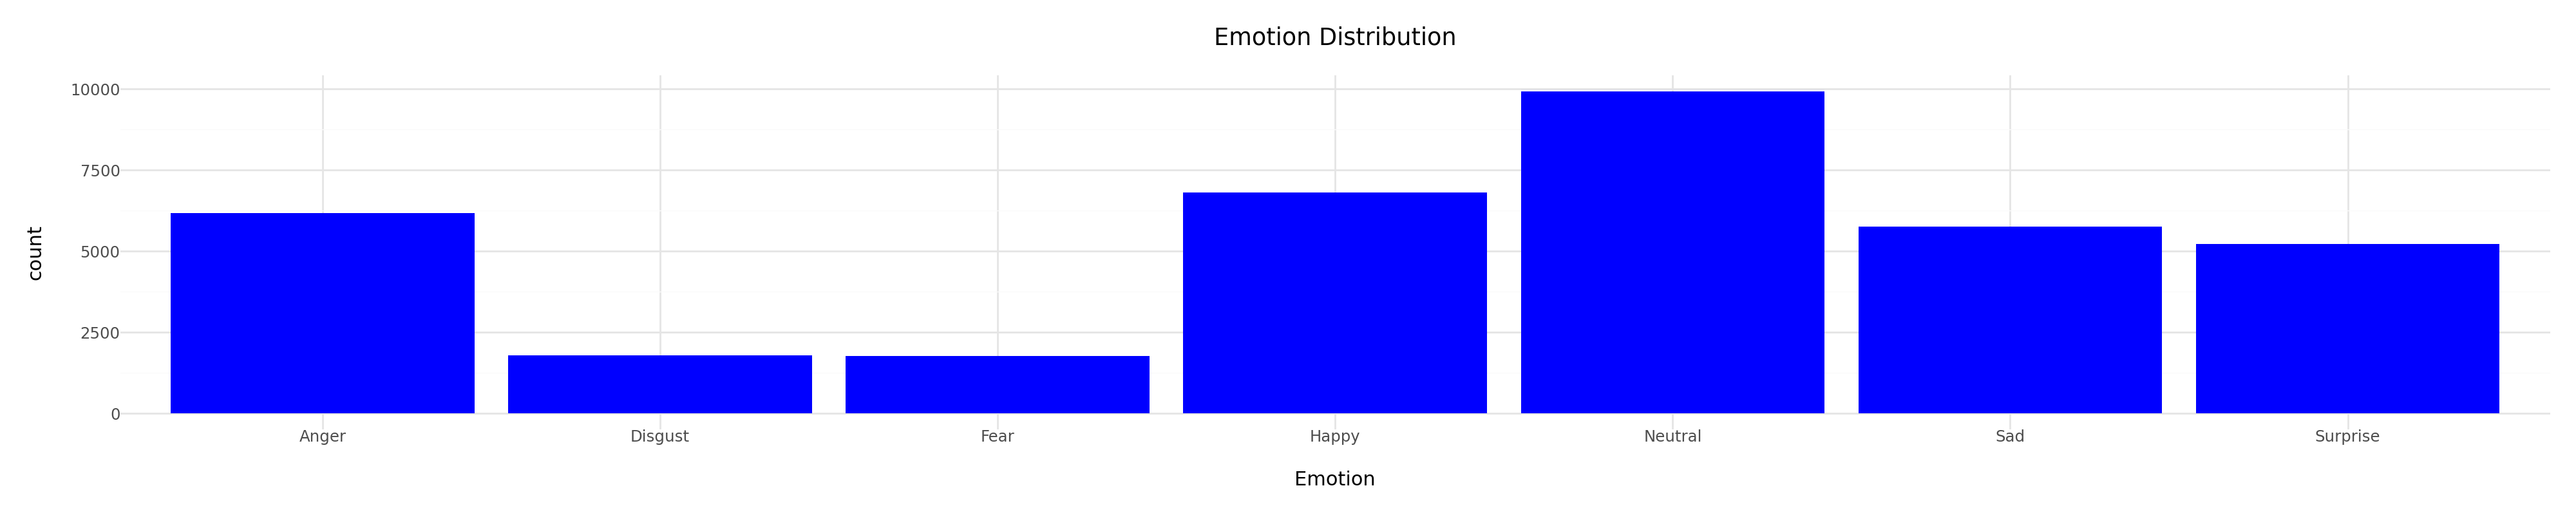

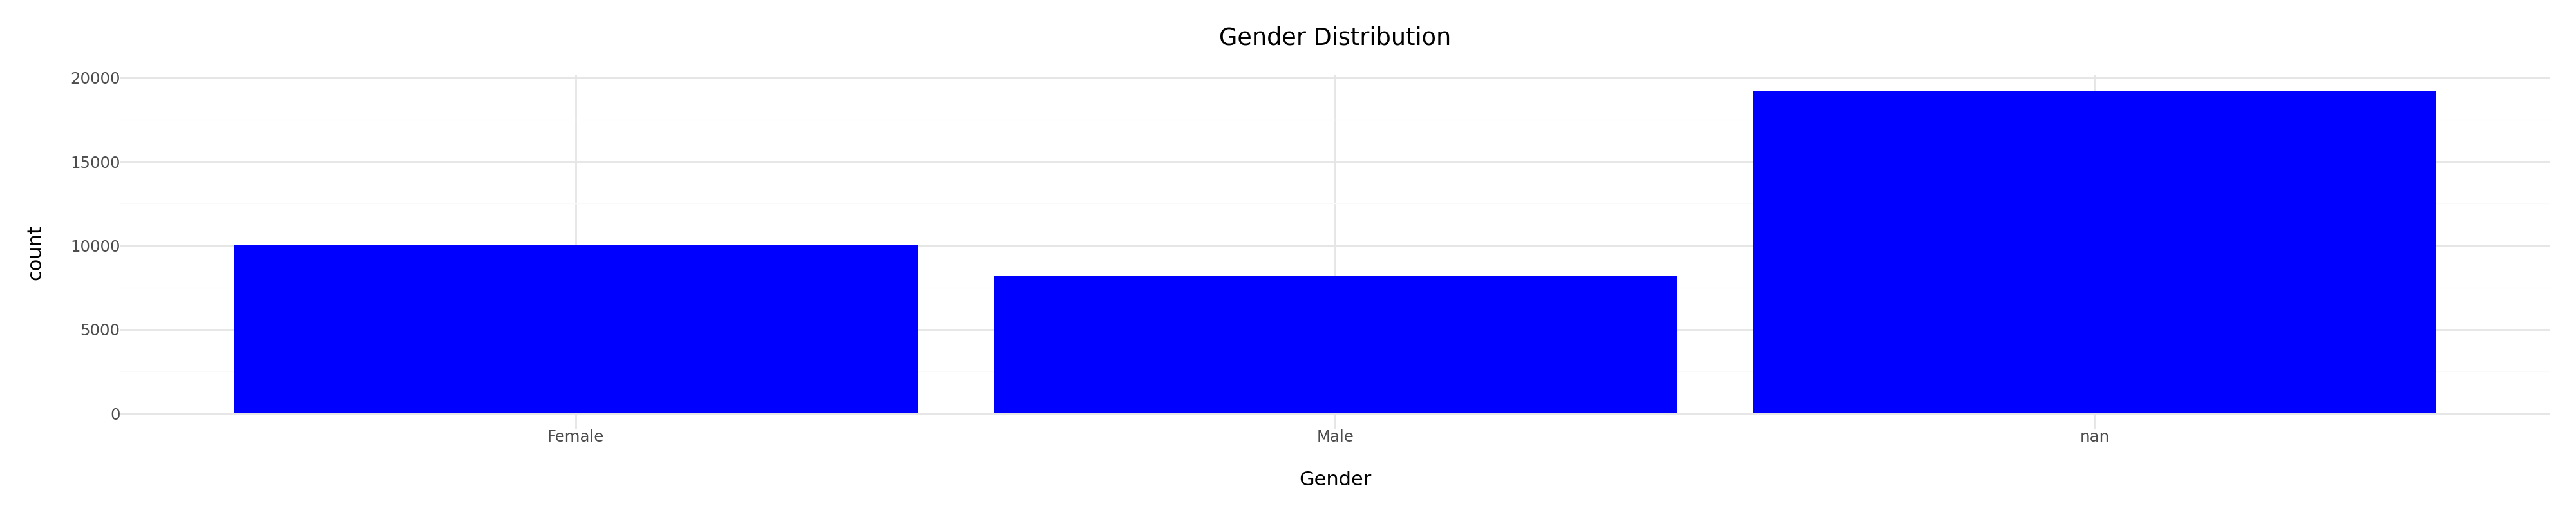

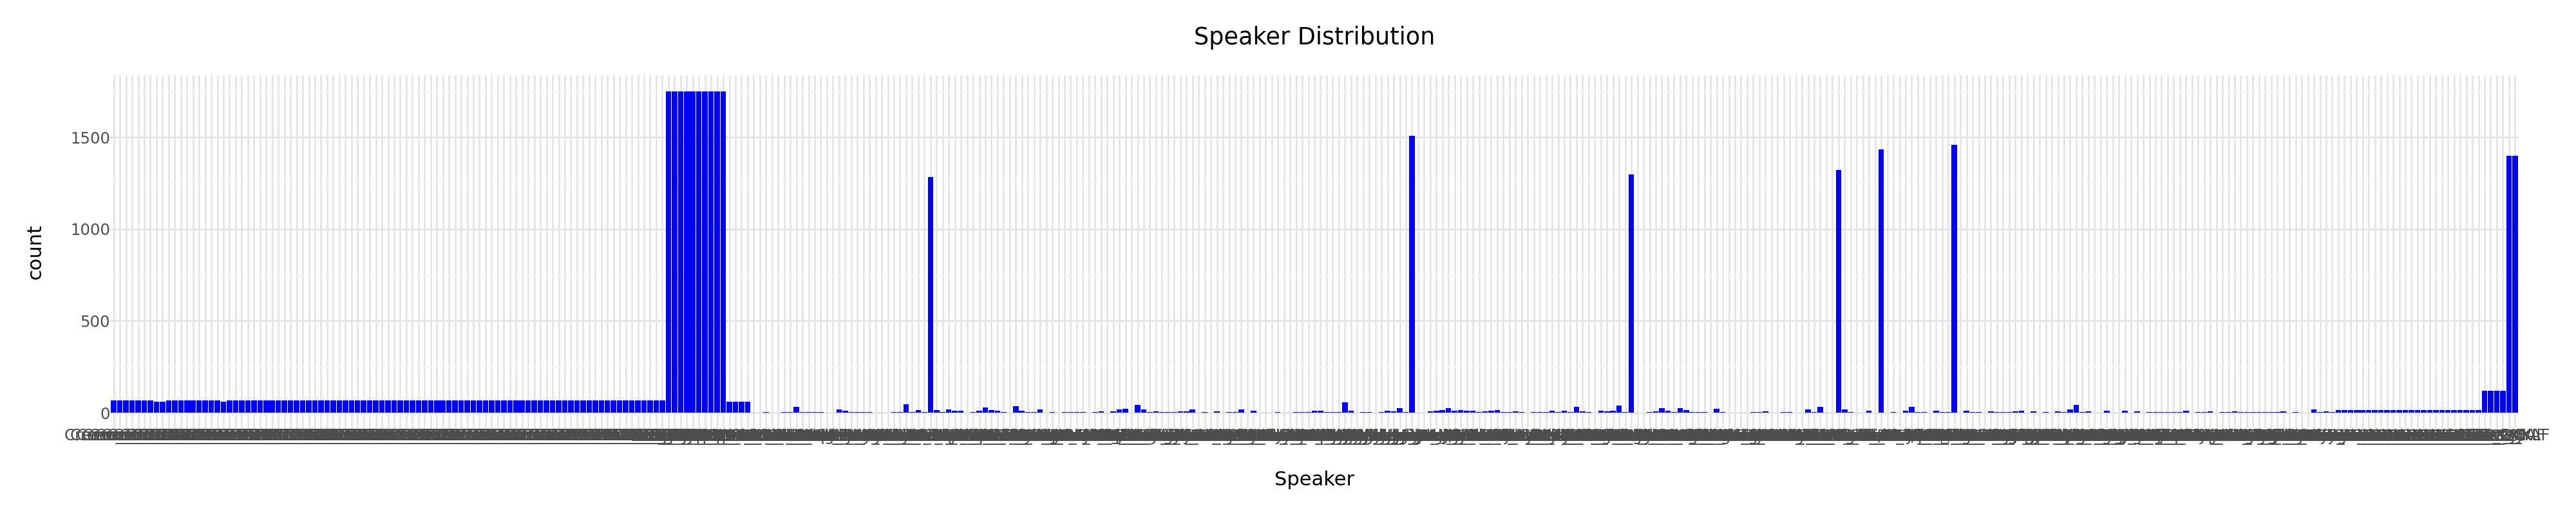

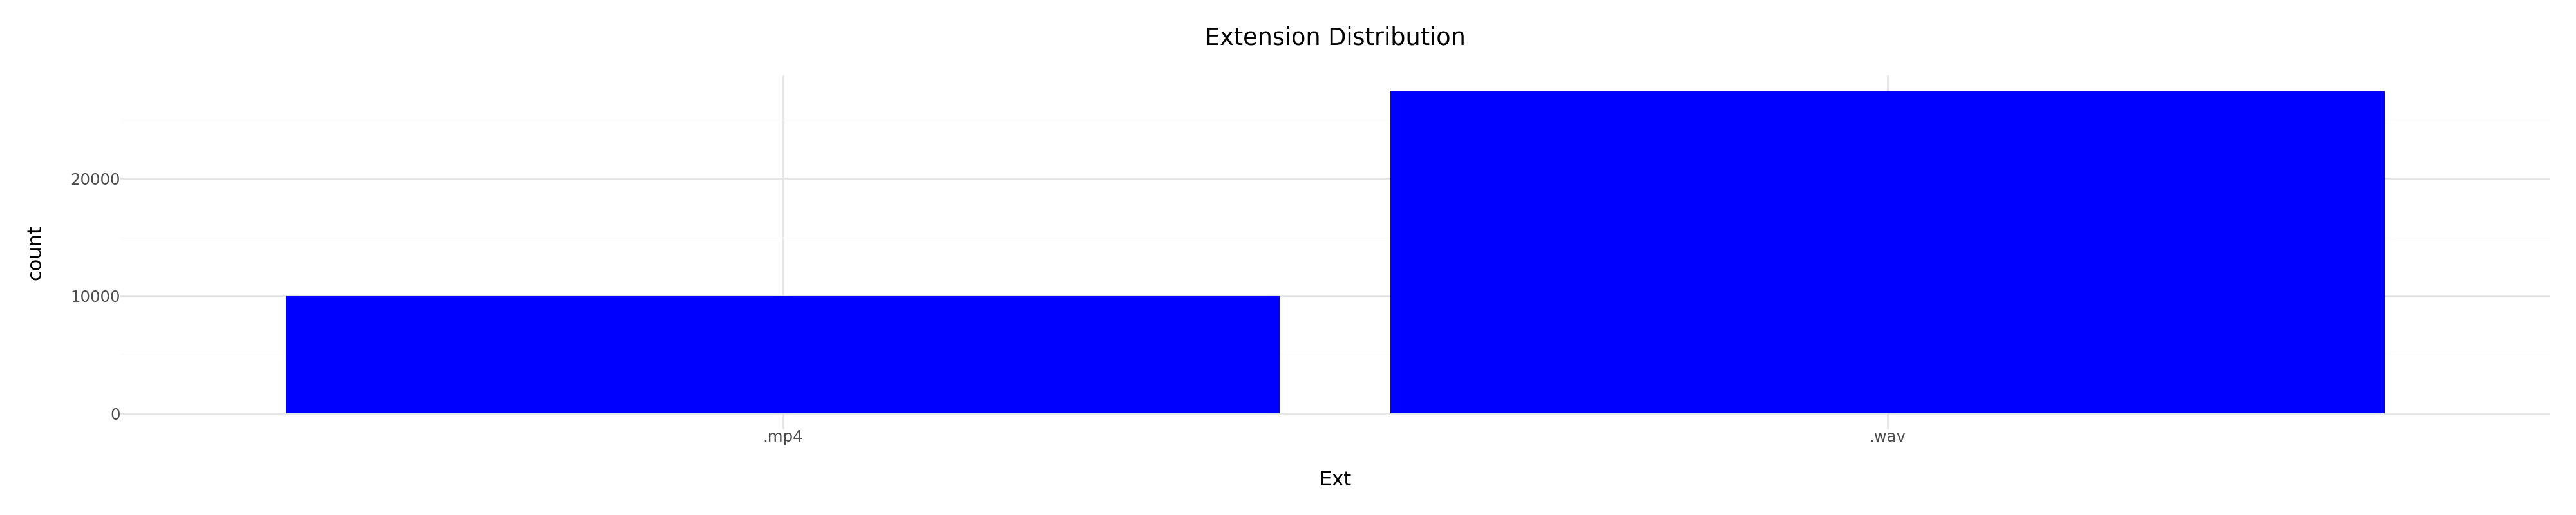

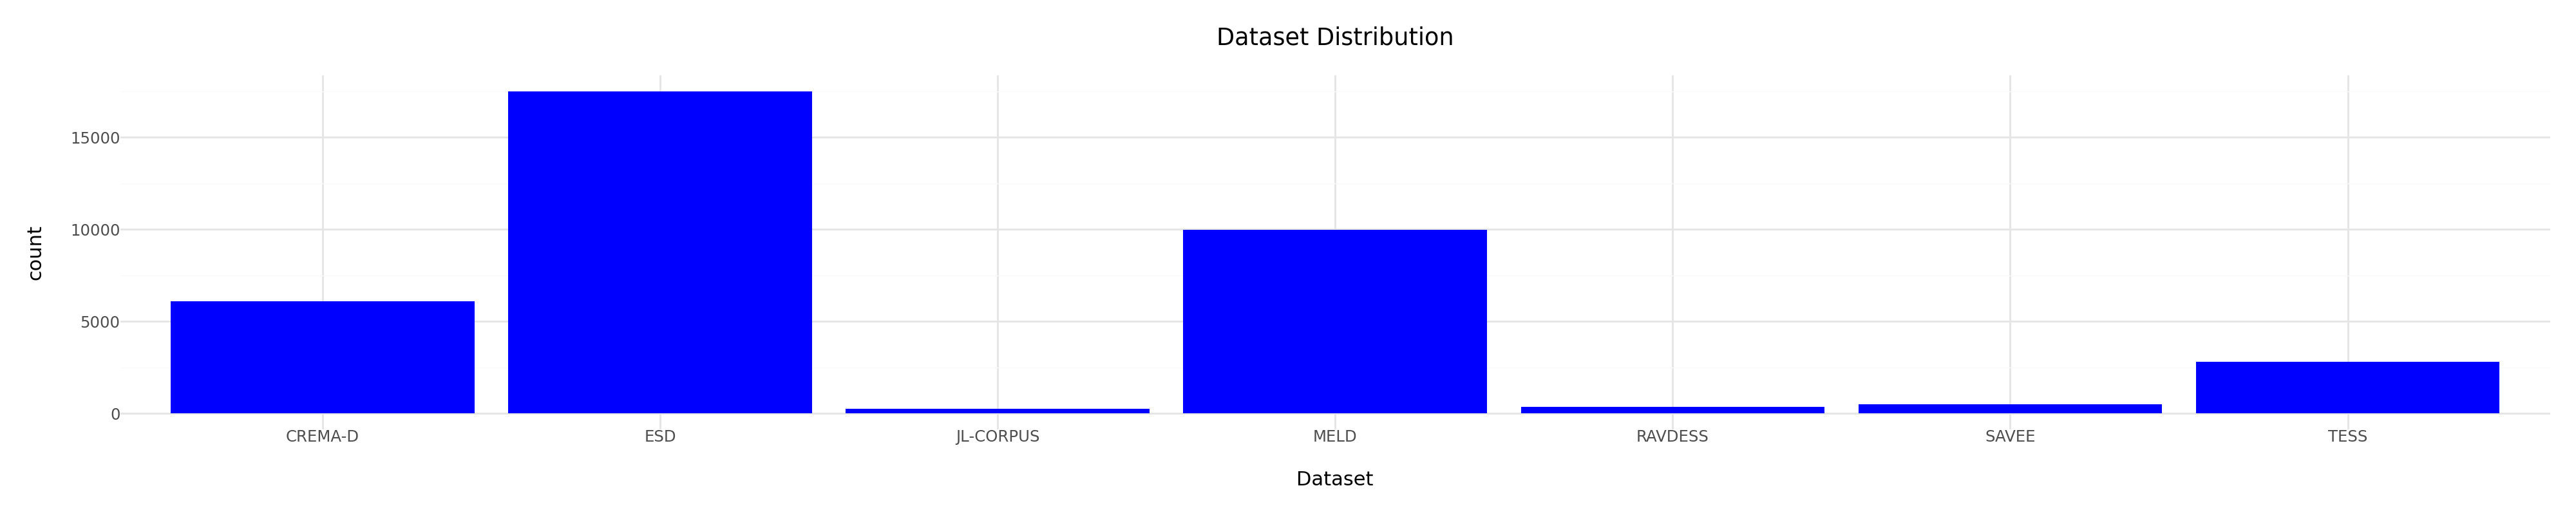

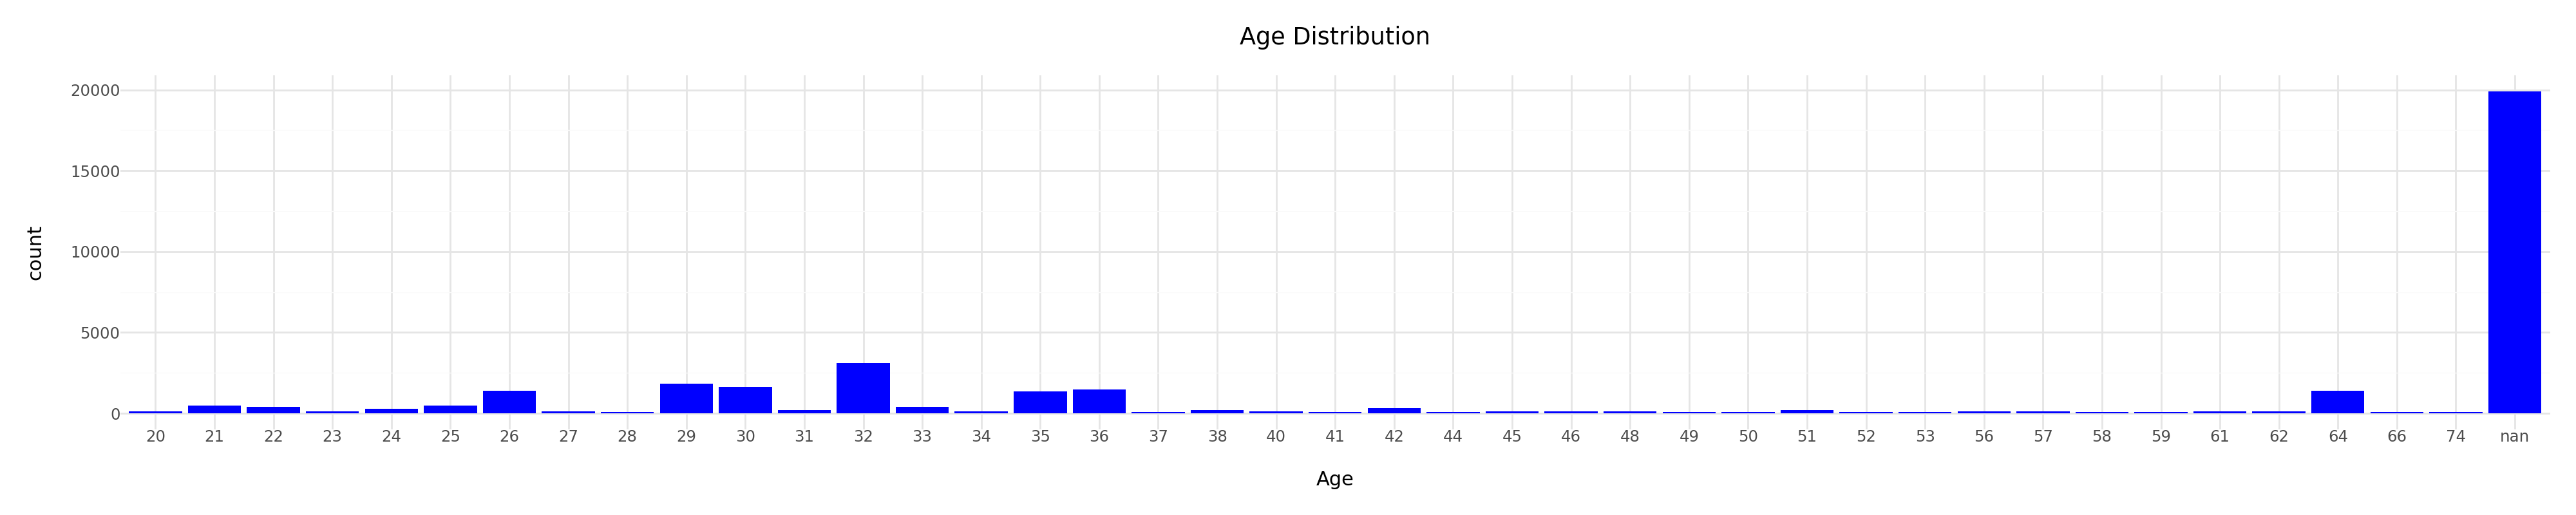

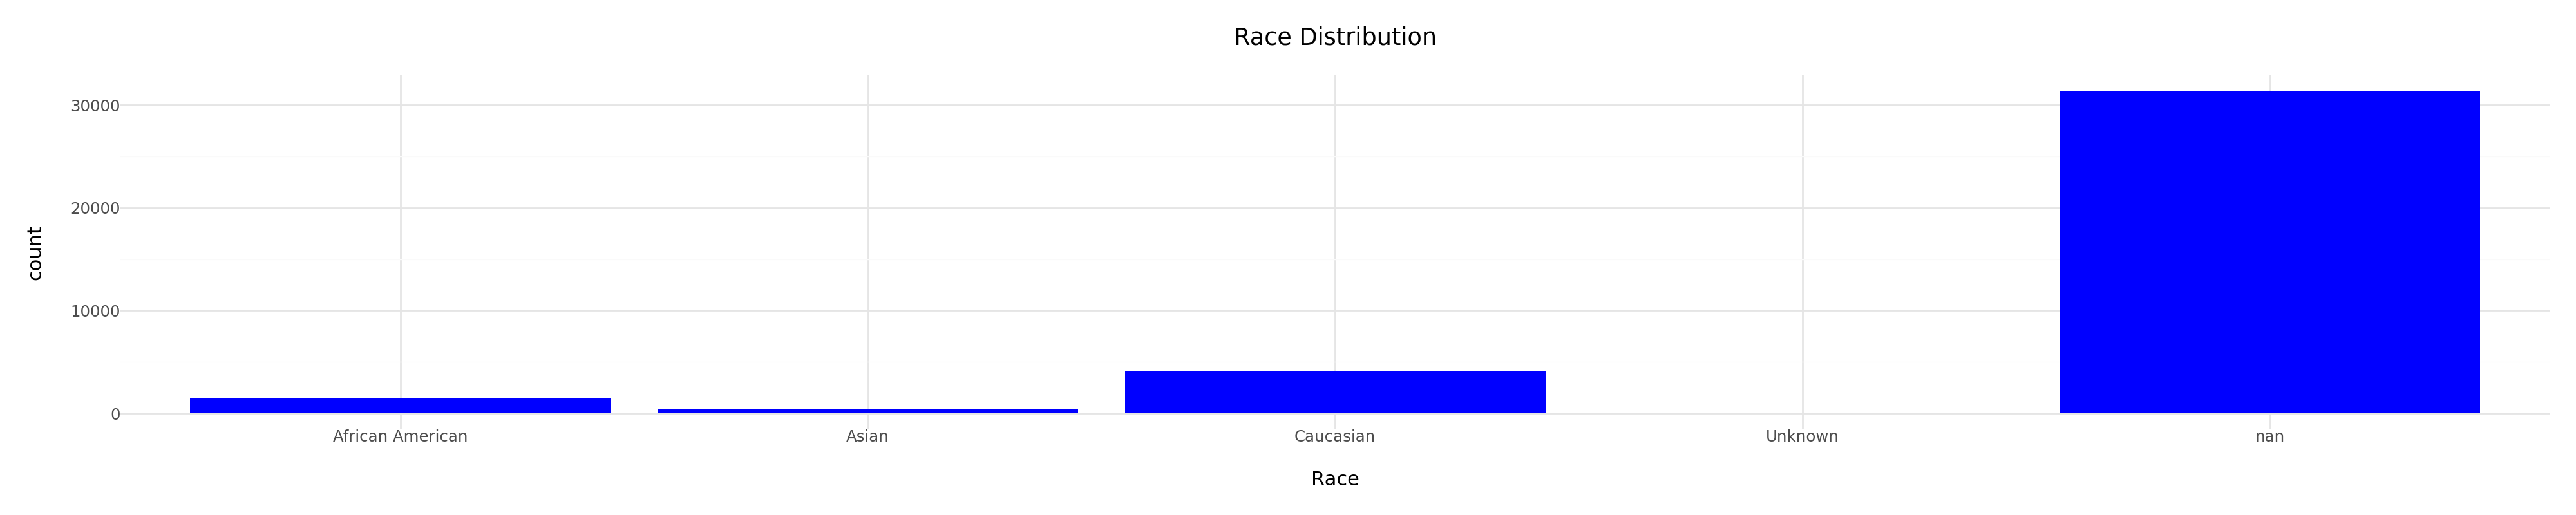

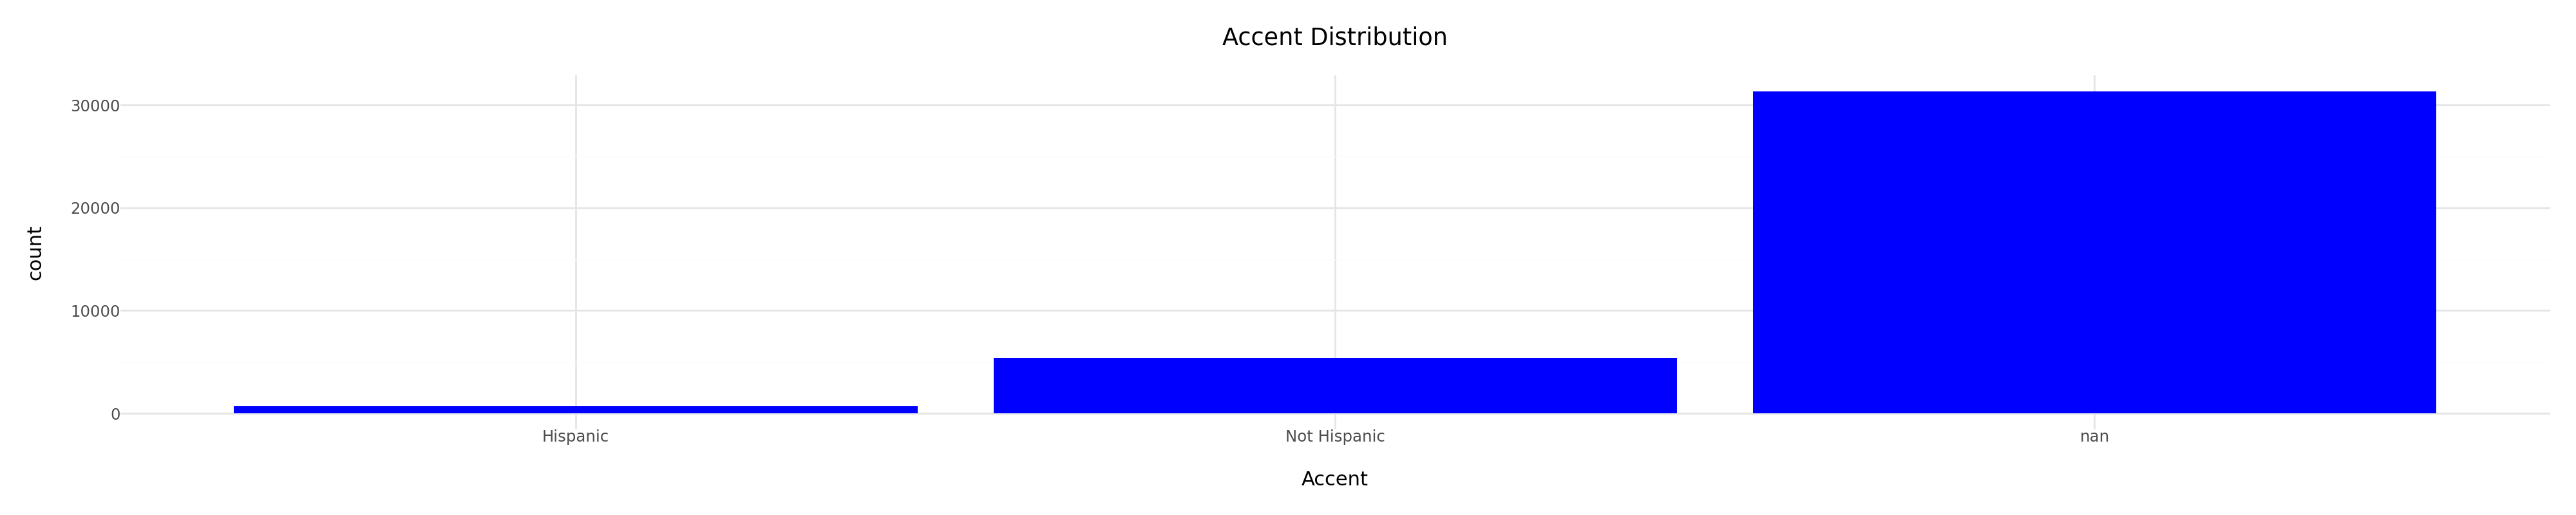

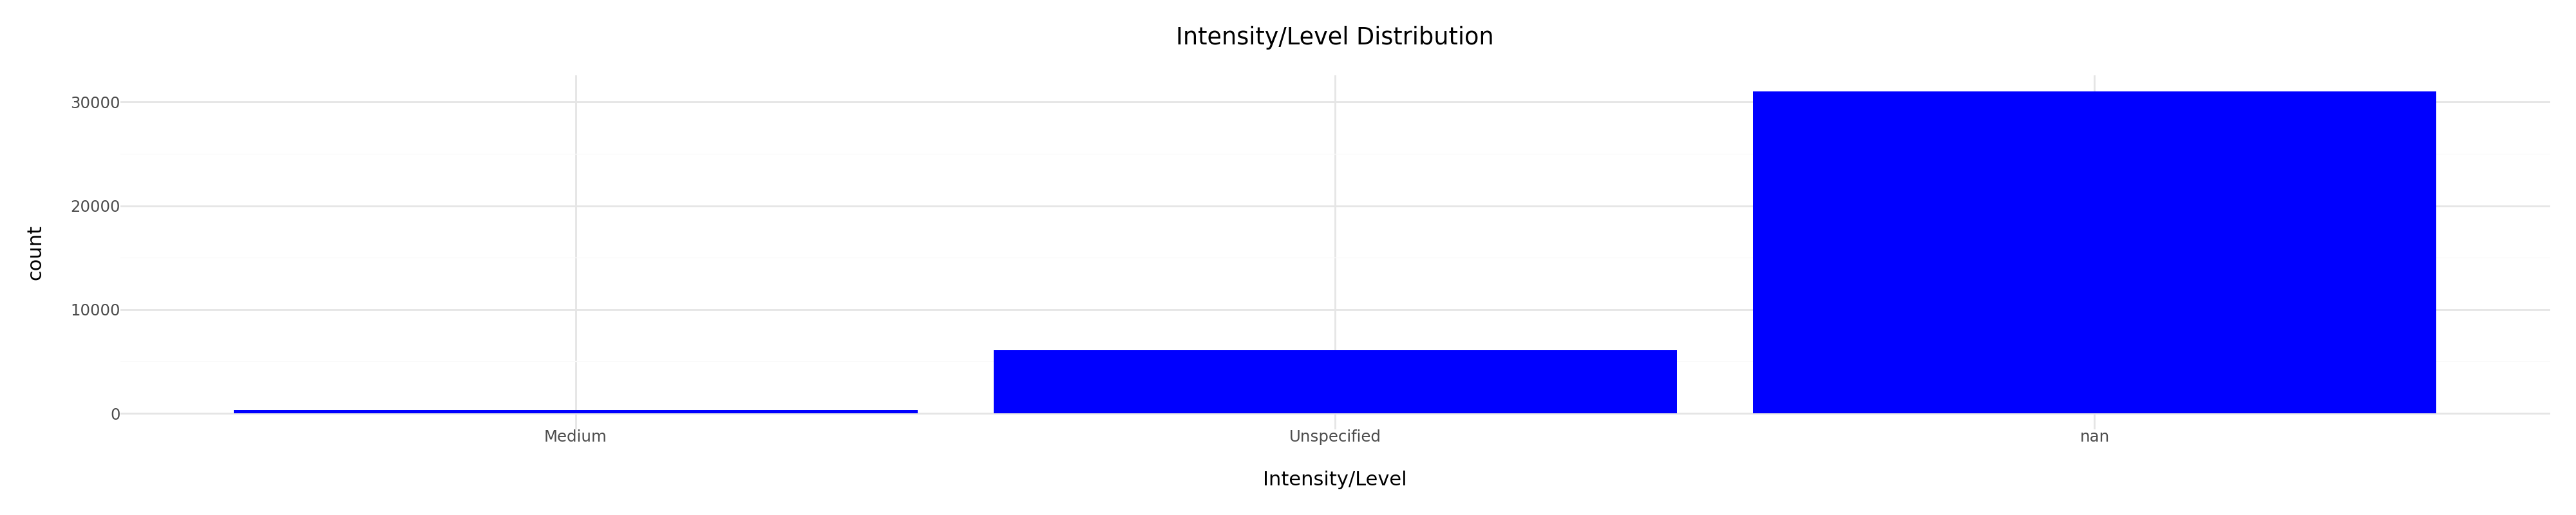

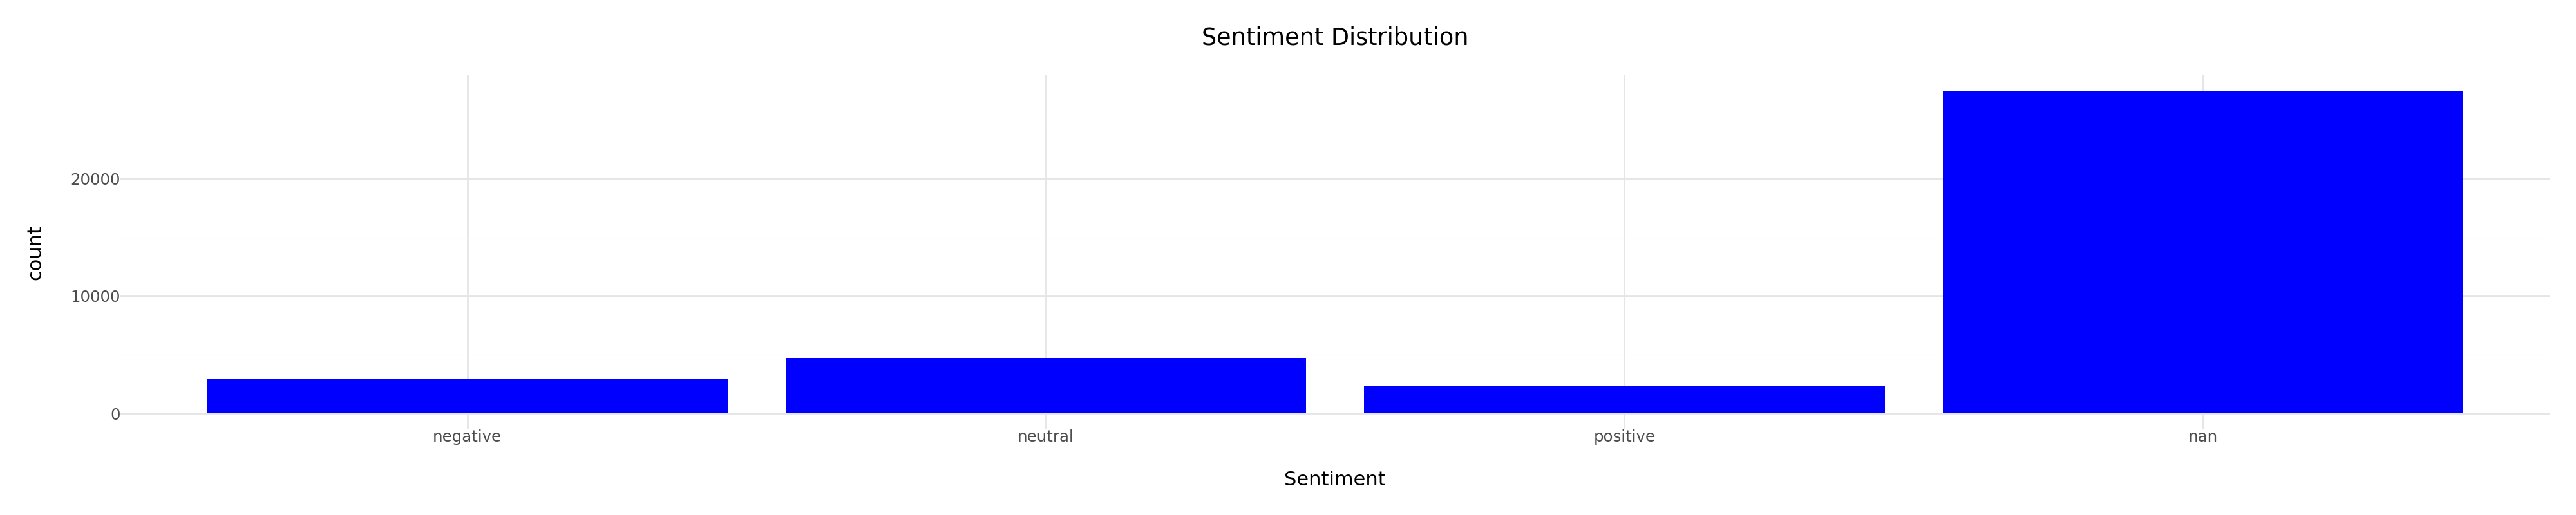

In [264]:
plots(df)

# Removal of useless data

In [265]:
df = df[['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Speaker', 'Text', 'Gender', 'Age', 'Emotion']].reset_index(drop=True)
df

,Id,Dataset,Filepath,Filename,Ext,Speaker,Text,Gender,Age,Emotion
0,0,CREMA-D,crema-d\AudioWAV\1001_DFA_ANG_XX.wav,1001_DFA_ANG_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Anger
1,1,CREMA-D,crema-d\AudioWAV\1001_DFA_DIS_XX.wav,1001_DFA_DIS_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Disgust
2,2,CREMA-D,crema-d\AudioWAV\1001_DFA_FEA_XX.wav,1001_DFA_FEA_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Fear
3,3,CREMA-D,crema-d\AudioWAV\1001_DFA_HAP_XX.wav,1001_DFA_HAP_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Happy
4,4,CREMA-D,crema-d\AudioWAV\1001_DFA_NEU_XX.wav,1001_DFA_NEU_XX.wav,.wav,Crema_1001,Don't forget a jacket,Male,51,Neutral
...,...,...,...,...,...,...,...,...,...,...
37417,37417,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_5a_1.wav,.wav,Jlcorpus_male2,The lord swims in the sea.,Male,NaN,Sad
37418,37418,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_6a_1.wav,.wav,Jlcorpus_male2,Jack views an art piece.,Male,NaN,Sad
37419,37419,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_7a_1.wav,.wav,Jlcorpus_male2,Carl leaps into a jeep.,Male,NaN,Sad
37420,37420,JL-CORPUS,jl-corpus/Raw JL corpus (unchecked and unannot...,male2_sad_8a_1.wav,.wav,Jlcorpus_male2,Linda asks for more darts.,Male,NaN,Sad


In [266]:
df.to_csv(f"{RAW_DATASET_PATH}/speech_dataset.csv", index=False)

In [267]:
df_no_meld = df[df['Dataset'] != 'MELD']
df_no_meld.to_csv(f"{RAW_DATASET_PATH}/speech_dataset_no_meld.csv", index=False)

In [268]:
df_meld = df[df['Dataset'] == 'MELD']
df_meld.to_csv(f"{RAW_DATASET_PATH}/speech_dataset_meld.csv", index=False)